In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Frame improvements

In [10]:
sample_df = pd.read_csv("../data/human/val_set_sample.csv", index_col=[0])
anno_df = pd.read_json("../data/annotated/vision/val_set_pixtral_anno.jsonl", lines=True, orient="records")
anno_df.set_index("uuid", inplace=True)

In [11]:
len(anno_df)

300

In [12]:
label_cols = [col for col in anno_df.columns if 'frame-name' in col]
label_cols

['normal_frame-name',
 'normal_with_sptok_frame-name',
 'normal_no_fix_frame-name',
 'mini_frame-name',
 'normal_basic_frame-name',
 'mini_basic_frame-name',
 'normal_no_num_frame-name',
 'mini_no_num_frame-name']

In [13]:
anno_df[label_cols].describe()

,normal_frame-name,normal_with_sptok_frame-name,normal_no_fix_frame-name,mini_frame-name,normal_basic_frame-name,mini_basic_frame-name,normal_no_num_frame-name,mini_no_num_frame-name
count,300,300,300,300,300,300,300,300
unique,17,17,17,16,15,16,17,14
top,None,None,None,None,None,None,None,None
freq,57,52,42,117,68,113,69,138


In [15]:
merged_df = sample_df.join(anno_df[label_cols+['image_url']], how="inner")

In [16]:
for col in label_cols:
    merged_df[col] = merged_df[col].str.lower()

In [18]:
results = {}
for col in label_cols:
        correct = 0
        for i, row in merged_df.iterrows():
                if row[col] in row['merged_labels']:
                        correct += 1
        accuracy = correct / len(merged_df)
        results[col] = accuracy
        print(col, accuracy)

normal_frame-name 0.36666666666666664
normal_with_sptok_frame-name 0.3333333333333333
normal_no_fix_frame-name 0.4
mini_frame-name 0.5
normal_basic_frame-name 0.3
mini_basic_frame-name 0.3
normal_no_num_frame-name 0.3333333333333333
mini_no_num_frame-name 0.4


<Axes: >

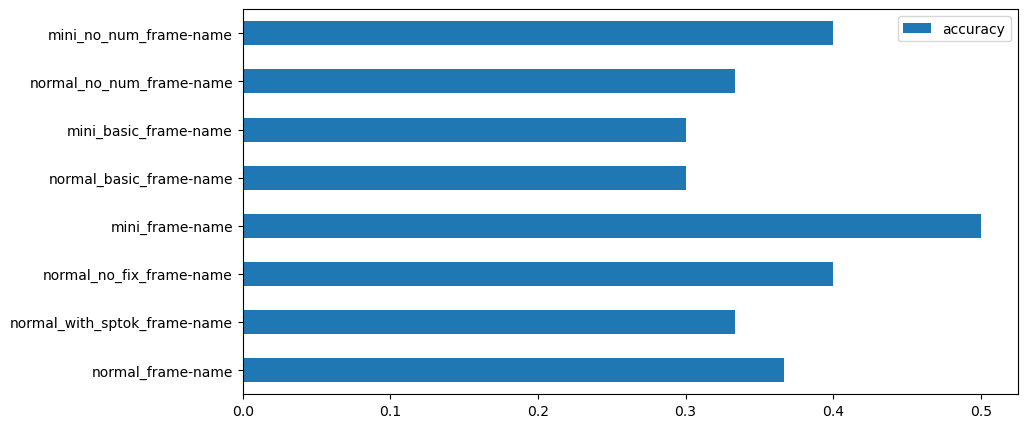

In [21]:
pd.DataFrame(results, index=["accuracy"]).T.plot(kind="barh", figsize=(10, 5))

In [61]:
def plot_image(img_urls, labels, preds):
    assert len(img_urls) == 4
    fig, ax = plt.subplots(1, 4, figsize=(20,5))
    for i, (url, label, pred) in enumerate(zip(img_urls, labels, preds)):
        image = plt.imread("../"+url)
        ax[i].imshow(image)
        ax[i].set_title(f"Label: {label}\nPred: {pred}")
        ax[i].axis("off")

def plot_image_title(img_url, explanation, title):
    image = plt.imread("../"+img_url)
    plt.imshow(image)
    plt.figtext(0.5, 0.01, explanation, wrap=True, horizontalalignment='center', fontsize=7)
    plt.title(f"Article Title: {title}")
    plt.axis("off")

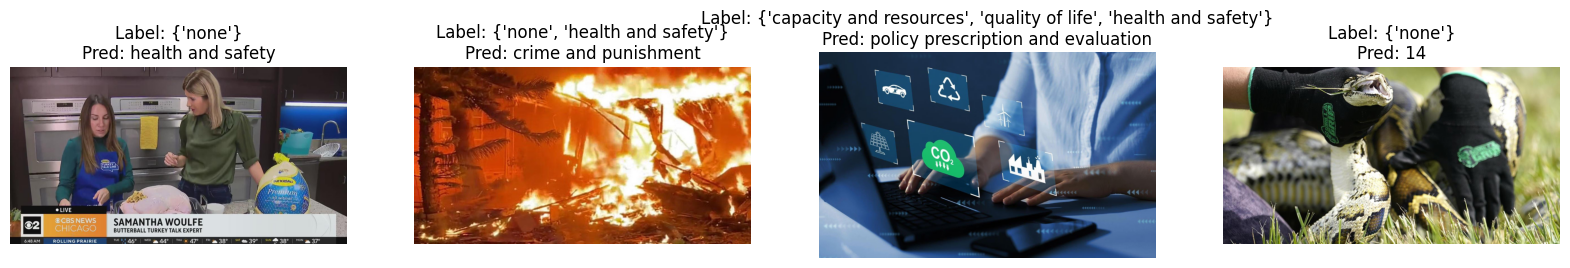

In [48]:
sample_incorrect = merged_df[merged_df["correct"] == 0].sample(4)
plot_image(sample_incorrect['image_url'], sample_incorrect['merged_labels'], sample_incorrect['frame-name'])

### Surprise/Different experiments

In [75]:
df = pd.read_json("../data/annotated/vision/diff_frame_sample_100_pixtral_anno.jsonl", lines=True, orient="records")
len(df)

100

In [79]:
label_cols = [col for col in df.columns if 'deci' in col]
conf_cols = [col for col in df.columns if 'conf' in col]

In [80]:
for i, col in df[label_cols].items():
    print(col.value_counts())

verbose-task-eg-frames-sbin-csore_decision
True     91
False     5
Name: count, dtype: int64
verbose-frames-sbin-cscore_decision
True     95
False     3
Name: count, dtype: int64


In [81]:
for i, col in df[conf_cols].items():
    print(col.value_counts())

verbose-task-eg-frames-sbin-csore_confidence-score
8.0     84
7.0      5
9.0      4
10.0     3
Name: count, dtype: int64
verbose-frames-sbin-cscore_confidence-score
8.0     83
7.0      9
9.0      4
10.0     2
Name: count, dtype: int64


In [32]:
pd.set_option('display.max_colwidth', None)

In [95]:
pos_df = df[df['verbose-task-eg-frames-sbin-csore_decision'] == 'False'].sample(5)

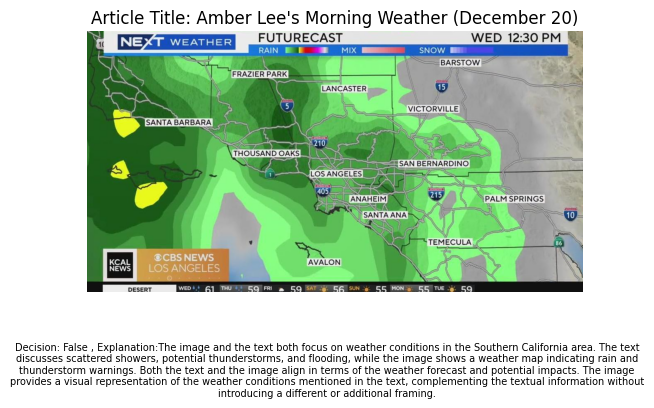

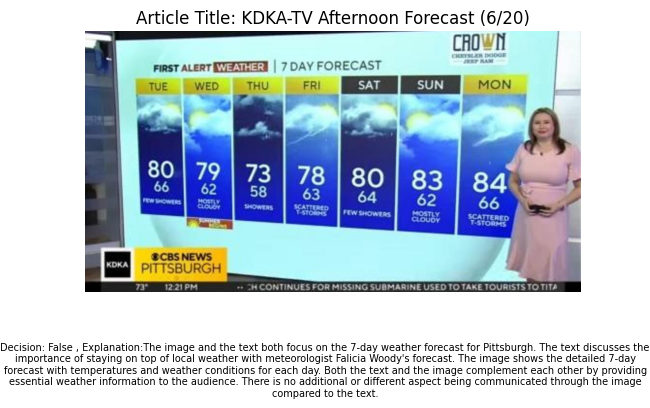

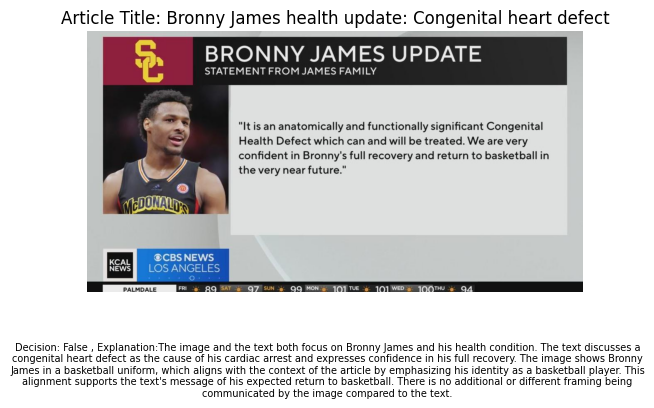

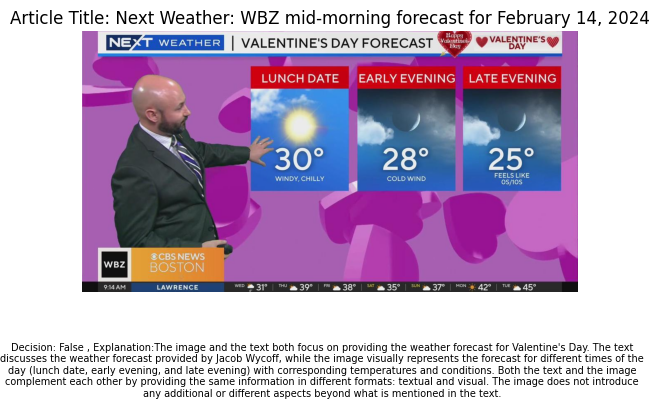

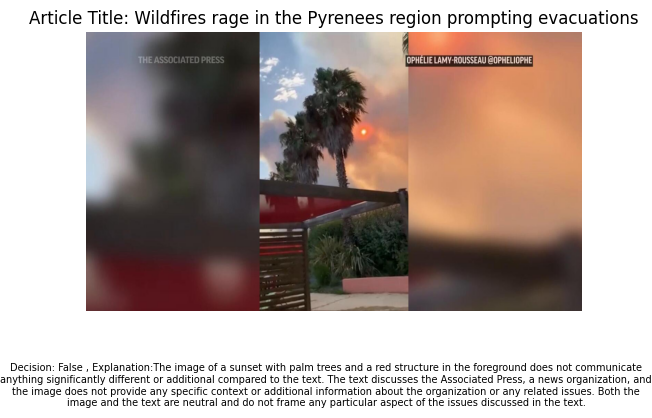

In [ ]:
for i, row in pos_df.iterrows():
    plot_image_title(row['image_url'], "Decision: "+row['verbose-task-eg-frames-sbin-csore_decision']+", Explanation:"+row['verbose-task-eg-frames-sbin-csore_explanation'], row['title'])
    plt.show()

In [43]:
df = pd.read_csv("../data/human/sample_data.csv", index_col=[0])
df.sample(100, random_state=11).to_csv("../data/human/sample_100.csv")